# Unit 5 - Financial Planning

In [46]:
import sys,os,os.path

In [47]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
from dotenv import find_dotenv
from pathlib import Path
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [48]:
api_path = Path("example.env")
load_dotenv(api_path)
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [49]:
# Set current amount of crypto assets
my_btc = 1.2 # Set the amount of Bitcoin in my portfolio
my_eth = 5.3 # Set the amount of Ethereum in my portfolio

In [50]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [51]:
# Fetch current BTC price
request_json = requests.get(btc_url).json() # Fetch the current price of Bitcoin
btc_price = request_json['data']['1']['quotes']['USD']['price'] # Extract the price of Bitcoin from the json response
# Fetch current ETH price
requests_json = requests.get(eth_url).json() #Fetch the current price of Ethereum
eth_price = requests_json['data']['1027']['quotes']['USD']['price'] #Extract the price of Ethereum from the json response

# Compute current value of my crpto
my_btc_value = my_btc * btc_price # Calculate the current value of my Bitcoin
my_eth_value = my_eth * eth_price # Calculate the current value of my Ethereum

# Print current crypto wallet balance
print(f"You have {my_btc} BTC, priced at {btc_price:0.2f}, is ${my_btc_value:0.2f}")
print(f"You have {my_eth} ETH, priced at {btc_price:0.2f}, is ${my_eth_value:0.2f}")
print(f"The current value of the {my_btc+my_eth} coins in your crypto is ${my_btc_value+my_eth_value:0.2f}")

You have 1.2 BTC, priced at 44789.00, is $53746.80
You have 5.3 ETH, priced at 44789.00, is $12851.39
The current value of the 6.5 coins in your crypto is $66598.19


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [52]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [53]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY") 
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY") 

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

In [54]:
# Format current date as ISO format
today = pd.Timestamp("2024-01-31", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(tickers,timeframe,start = today,end = today).df
df_portfolio.head()

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
combined_df = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])
# Preview DataFrame
combined_df.head()

AGG                                            \
                          close   high    low trade_count  open    volume   
timestamp                                                                   
2024-01-31 05:00:00+00:00  99.1  99.26  98.81       42254  99.0  10829125   

                                        SPY                                \
                               vwap   close      high     low trade_count   
timestamp                                                                   
2024-01-31 05:00:00+00:00  99.05177  482.88  489.0813  482.86      780578   

                                                          
                             open     volume        vwap  
timestamp                                                 
2024-01-31 05:00:00+00:00  488.62  126011062  485.893814

In [55]:
# Pick AGG and SPY close prices
closing_prices_df = pd.DataFrame() #create empty df to hold closing prices

closing_prices_df["AGG"] = combined_df["AGG"]["close"] #separate AGG closing prices from combined df and store in closing price df
closing_prices_df["SPY"] = combined_df["SPY"]["close"] #separate SPY closing prices from combined df and store in closing price df

closing_prices_df.index = closing_prices_df.index.date #set index to date only
closing_prices_df.head()
agg_close_price = closing_prices_df["AGG"][0] #store AGG closing price in variable
spy_close_price = closing_prices_df["SPY"][0] #store SPY closing price in variable

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.1
Current SPY closing price: $482.88


In [56]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price #calculate current value of SPY shares  
my_agg_value = my_agg * agg_close_price #calculate current value of AGG shares  

# Print current value of shares
print(f"You have {my_spy} SPY shares, priced at ${spy_close_price:0.2f} per share, for a total value of ${my_spy_value:0.2f}")
print(f"You have {my_agg} AGG shares, priced at ${agg_close_price:0.2f} per share, for a total value of ${my_agg_value:0.2f}")
print(f"The current value of the {my_spy+my_agg} shares in your portfolio is ${my_spy_value+my_agg_value:0.2f}")

You have 50 SPY shares, priced at $482.88 per share, for a total value of $24144.00
You have 200 AGG shares, priced at $99.10 per share, for a total value of $19820.00
The current value of the 250 shares in your portfolio is $43964.00


### Savings Health Analysis

In [57]:
# Set monthly household income
monthly_income = 12000
# Consolidate financial assets data
crypto = my_btc_value + my_eth_value #calculate total value of crypto
shares = my_spy_value + my_agg_value #calculate total value of shares
print(f"The current value of your {my_btc+my_eth} crypto coins is ${crypto:0.2f}")
print(f"The current value of your {my_spy+my_agg} shares is ${shares:0.2f}")
# Create savings DataFrame
df_savings = pd.DataFrame([crypto,shares],index=['crypto','shares'],columns=['amount']) #create df with crypto and shares as index and amount as column

# Display savings DataFrame
display(df_savings)

The current value of your 6.5 crypto coins is $66598.19
The current value of your 250 shares is $43964.00


,amount
crypto,66598.187
shares,43964.000


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

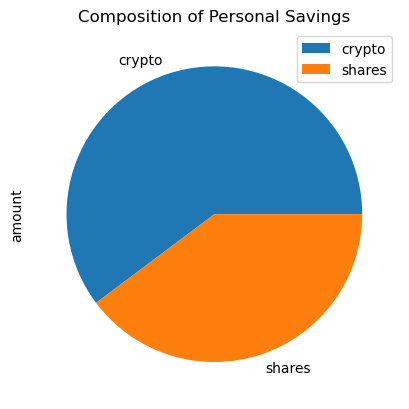

In [58]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',title='Composition of Personal Savings')

In [59]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
df_savings_sum = df_savings['amount'].sum() #sum the amount column in the savings df

# Validate saving health
if df_savings_sum > emergency_fund: #check if savings is greater than emergency fund
    print(f"Congratulations! You have enough money in your emergency fund.")
elif df_savings_sum == emergency_fund: #check if savings is equal to emergency fund
    print(f"Congratulations! You have reached your financial goal.")
else:
    print(f"You are ${emergency_fund - df_savings_sum} away from reaching the goal") #print how much more is needed to reach the goal

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [60]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [61]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(tickers,timeframe,start = start_date,end = end_date).df
df_stock_data.head()

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG,SPY],keys=['AGG','SPY'],axis=1)
# Display sample data
df_stock_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2016-05-02 04:00:00+00:00  3608552  110.626939  207.9700  208.18  206.41   
2016-05-03 04:00:00+00:00  3128774  110.864495  206.1592  206.80  205.28   
2016-05-04 04:00:00+00:00  3096337  110.877983  205.0100  205.85  204.42   
2016-05-05 04:00:00+00:00  3052967  111.030002  204.9700  205.98  204.47   
2016-05-06 04:00:00+00:00  2922700  111.027631  205.7200  205.77  203.88   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00      263586  206.92   64747229  207.305695  
2016-05-03 04:00:00+00:00      377523  206.52  108050343  206.309997  
2016-05-04 04:00:00+00:00      345266  204.99   94995641  205.086315  
2016-05-05 04:00:00+00:00      280626  205.56   68425268  205.140615  
2016-05-06 04:00:00+00:00      340162  204.06   90999800  204.943796

In [62]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(portfolio_data = df_stock_data,weights = [.60,.40],num_simulation = 500,num_trading_days = 252*30)

In [63]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-05-02 04:00:00+00:00  3608552  110.626939          NaN  207.9700  208.18   
2016-05-03 04:00:00+00:00  3128774  110.864495     0.001853  206.1592  206.80   
2016-05-04 04:00:00+00:00  3096337  110.877983     0.000451  205.0100  205.85   
2016-05-05 04:00:00+00:00  3052967  111.030002     0.002526  204.9700  205.98   
2016-05-06 04:00:00+00:00  2922700  111.027631    -0.001530  205.7200  205.77   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  206.41      263586  206.92   64747229  207.305695   
2016-05-03 04:00:00+00:00  205.28      377523  206.52  108050343  206.309997   
2016-05-04 04:00:00+00:00  204.42      345266  204.99   94995641  205.086315   
2016-05-05 04:00:00+00:00  204.47      280626  205.56   68425268  205.140615   
2016-05-06 04:00:00+00:00  203.88      340162  204.06   90999800  204.943796   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00    -0.008707  
2016-05-04 04:00:00+00:00    -0.005574  
2016-05-05 04:00:00+00:00    -0.000195  
2016-05-06 04:00:00+00:00     0.003659

In [64]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
returns = MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 110.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 120.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 130.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 140.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 150.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 160.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 170.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 180.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 190.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 200.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 210.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 220.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 230.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 240.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 250.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 260.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 270.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 280.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 290.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 300.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 310.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 320.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 330.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 340.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 350.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 360.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 370.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 380.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 390.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 400.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 410.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 420.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 430.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 440.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 450.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 460.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 470.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 480.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 490.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

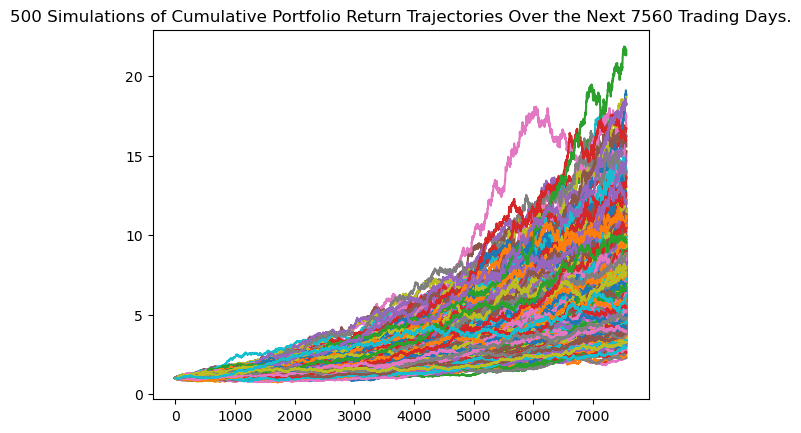

In [65]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

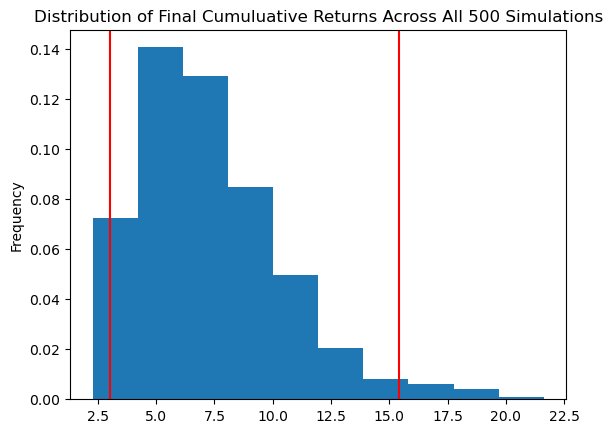

In [66]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [67]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return() 
#MC_fiveyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean              7.331097
std               3.124963
min               2.283827
25%               4.986717
50%               6.703056
75%               8.835493
max              21.621064
95% CI Lower      3.019153
95% CI Upper     15.418252
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [68]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $30191.53 and $154182.52


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [69]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $30191.53 and $154182.52


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [70]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(portfolio_data = df_stock_data,weights = [.60,.40],num_simulation = 500,num_trading_days = 252*5) #Set the simulation parameters
returns = MC_fiveyear.calc_cumulative_return() #Run the simulation

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 120.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 150.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 200.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 250.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 280.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 330.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 360.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 370.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 400.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 410.
Running Monte Carlo simulation number 420.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 430.
Running Monte Carlo simulation number 440.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 450.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 460.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 470.
Running Monte Carlo simulation number 480.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 490.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

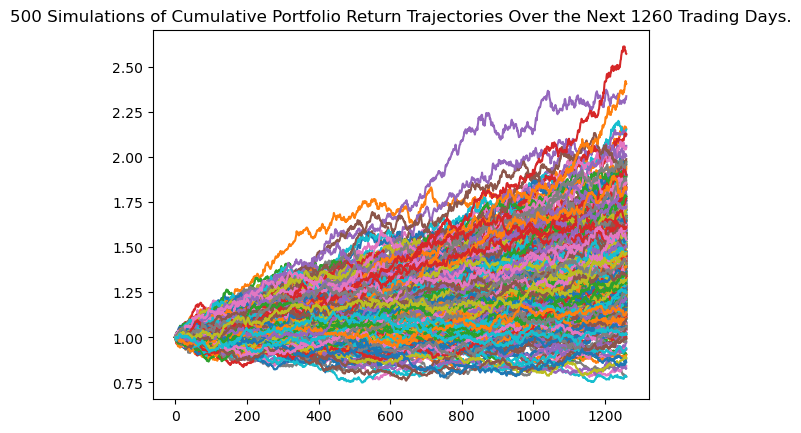

In [71]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

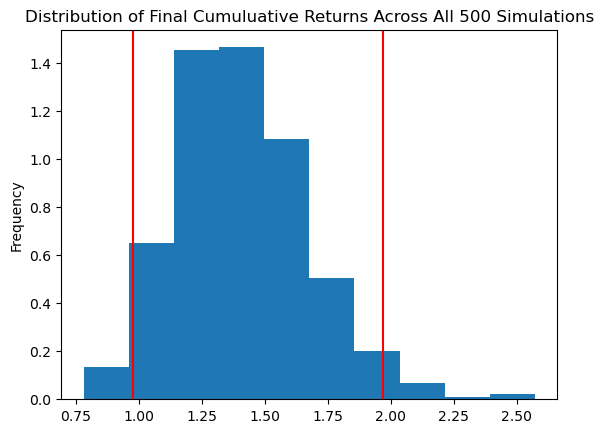

In [72]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [75]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return() 

# Print summary statistics
print(tbl)

count           500.000000
mean              1.408933
std               0.262245
min               0.782138
25%               1.232340
50%               1.385684
75%               1.570302
max               2.571600
95% CI Lower      0.975018
95% CI Upper      1.967279
Name: 1260, dtype: float64


In [76]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(tbl[8]*10000,2)
ci_upper_five = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $9750.18 and $19672.79


### Ten Years Retirement Option

In [77]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(portfolio_data = df_stock_data,weights = [.60,.40],num_simulation = 500,num_trading_days = 252*10) #Set the simulation parameters
returns = MC_tenyear.calc_cumulative_return() #Run the simulation

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 130.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 140.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 150.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 160.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 170.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 180.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 190.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 200.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 210.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 220.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 230.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 240.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 250.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 260.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 270.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 280.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 290.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 300.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 310.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 320.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 330.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 340.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 350.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 360.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 370.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 380.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 390.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 400.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 410.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 420.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 430.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 440.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 450.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 460.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 470.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 480.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTool

Running Monte Carlo simulation number 490.


c:\Users\ryele\Downloads\Columbia-FinTech-Bootcamp\Assignments\Module 5 - Feb 7th\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


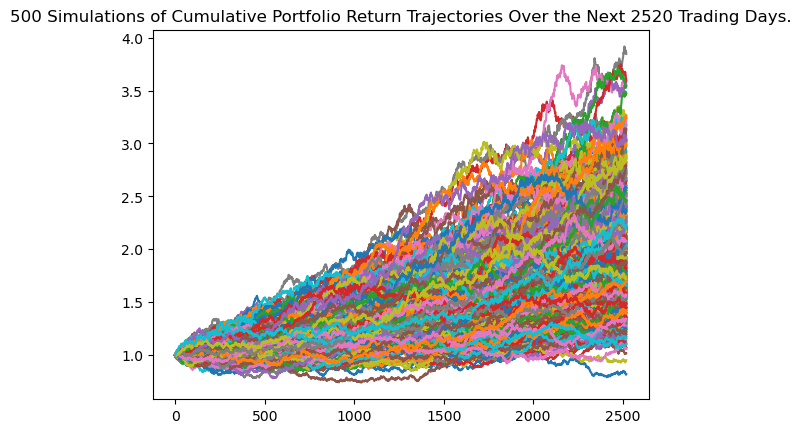

In [78]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

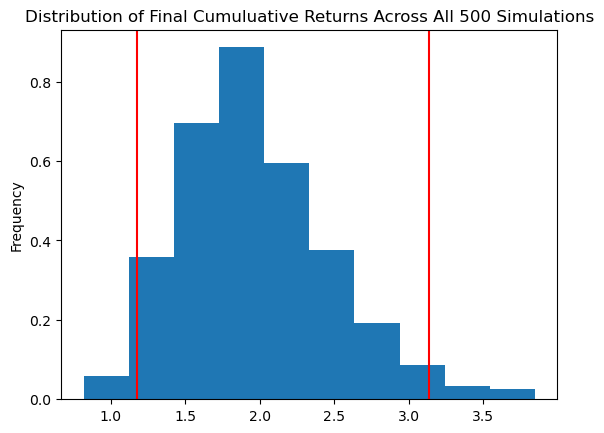

In [79]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [80]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_tenyear.summarize_cumulative_return() 

# Print summary statistics
print(tbl)

count           500.000000
mean              1.967861
std               0.502741
min               0.821328
25%               1.609023
50%               1.883575
75%               2.262578
max               3.844962
95% CI Lower      1.177930
95% CI Upper      3.133950
Name: 2520, dtype: float64


In [81]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_ten = round(tbl[8]*10000,2)
ci_upper_ten = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $11779.3 and $31339.5
